# Exploring the dataset

In [2]:
import pandas as pd 
import pandas_datareader.data as web
import seaborn as sns
sns.set_style('whitegrid')

In [3]:
start = datetime.datetime(2014, 1,1)
end = datetime.datetime(2020,12,31)

btc_df = web.DataReader("BTC-USD", 'yahoo', start, end)

In [4]:
btc_df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-17,468.174011,452.421997,465.864014,457.334015,21056800,457.334015
2014-09-18,456.859985,413.104004,456.859985,424.440002,34483200,424.440002
2014-09-19,427.834991,384.532013,424.102997,394.795990,37919700,394.795990
2014-09-20,423.295990,389.882996,394.673004,408.903992,36863600,408.903992
2014-09-21,412.425995,393.181000,408.084991,398.821014,26580100,398.821014


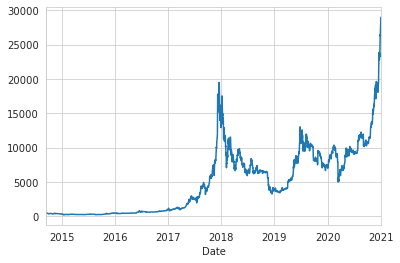

In [5]:
btc_df['Open'].plot()

In [10]:
import pandas as pd
import numpy as np
import mlflow
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [15]:
# Import the data
df = pd.read_csv("../data/training_data/training_data.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0
1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0
2,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0
4,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0


In [16]:
df = df.astype(np.float32)

In [17]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33,
                                                    random_state=4284, stratify=Y)

In [18]:
# Setting up experiments
mlflow.set_experiment("Baseline_Predictions")
mlflow.sklearn.autolog()

In [19]:
# Running the experiment
with mlflow.start_run(run_name="logistic_regression_model_baseline") as run:
    model = LogisticRegression()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    y_pred = np.where(preds>0.5, 1,0)
    f1 = f1_score(y_test, y_pred)
    mlflow.log_metric(key="f1_experiment_score", value=f1)